# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    function = (x**2)*(numpy.sin(x));
    return function;

Ensure your function works with numpy arrays:

In [16]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    int = ((2*x)*numpy.sin(x))+((2-x**2)*numpy.cos(x))-2;
    return int;

Check your solution with the same numpy array:

In [104]:
assert g(0) == 0.

In [105]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [5]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    defint = g(xmax) - g(xmin);
    return defint;

In [124]:
integrate_analytic(0,4)

1.0965907296271418

Check your analytic function:

In [122]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [6]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    fmin = f(xmin);
    fmax = f(xmax);
    h = ((xmax - xmin)/(N));
    I = 0
    #fl = []
    for i in range(1,N+1):
        Lelem = xmin + ((i-1)*h)
       # fl.append(f(Relem))
        Relem = xmin + ((i)*h)
        #fl.append(f(Lelem))
        Melem = ((Relem + Lelem)/2)
        #fl.append(4*f(Melem))
        I = I + ((Relem - Lelem)/6) * (f(Relem) + f(Lelem) + 4*f(Melem));              
    #z = sum(fl)
    #numint = (h/3)*z;
    
    return I;

In [476]:
integrate_numeric(0, 4, 200)

1.0965907306660188

In [456]:
print(f(0)+(4*f(1))+(2*f(2))+(4*f(3))+f(4))

3.611743719065407


Make sure you have implemented Simpson's rule correctly:

In [7]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [8]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,"The fractional error between analytical and Simpson's rule integration as the number of panels is varied")

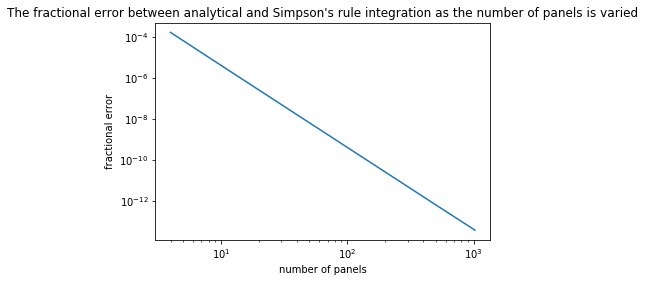

In [30]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
fracerror =[]
for i in panel_counts:
    fracerror.append(-(integrate_numeric(x0, x1, i)-integrate_analytic(x0, x1))/integrate_analytic(x0, x1))

plt.loglog(panel_counts,fracerror)
plt.xlabel('number of panels')
plt.ylabel('fractional error')
plt.title("The fractional error between analytical and Simpson's rule integration as the number of panels is varied")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The accuracy of the numerical method will increase, for large number of panels the error will show an asymptotic behaviour following the line $N^{-4}$ using Simpson's rule

If the trapezium rule was being used, how would the panel
count affect accuracy? 

It can be shown that for the Trapezium rule the error is proportional to $N^{-2}$